Project: NLP for Requirements Engineering Interview Transcripts

Fourth SQL Query: Data Warehouse Tags and Titles

**Query**

-- This query is used to select data related to questions and answers in the Stack Exchange platform. -- It retrieves question and answer IDs, titles, bodies, tags, creation dates, view counts, scores, and the number of answers.
SELECT TOP 500
q.Id AS QuestionId,
q.Title AS QuestionTitle,
q.Body AS QuestionBody,
q.Tags AS QuestionTags,
q.CreationDate AS Date,
q.ViewCount AS ViewCount,
q.Score AS Score,
q.AnswerCount AS NumberOfAnswers,
a.Id AS AnswerId,
a.Body AS AnswerBody

-- The query joins the Posts table with itself, where the answer post's ParentId matches the question post's Id.

FROM
Posts q
INNER JOIN
Posts a ON a.ParentId = q.Id

-- The WHERE clause filters the results to only include question posts, and those that have the specified tags or titles and were created after a certain date.

WHERE
q.PostTypeId = 1
AND(
q.Tags LIKE '%<data-governance>%'
OR q.Tags LIKE '%<data-management>%'
OR q.Tags LIKE '%<data-warehouse>%'
OR q.Tags LIKE '%<data-warehouse-architecture>%'
OR q.Tags LIKE '%<data-quality>%'
OR q.Tags LIKE '%<data-cleansing>%'
OR q.Tags LIKE '%<data-mapping>%'
OR q.Tags LIKE '%<data-modelling>%'
OR q.Tags LIKE '%<data-catalog>%'
OR q.Tags LIKE '%<data-architecture>%'
OR q.Title LIKE '%data governance%'
OR q.Title LIKE '%data management%'
OR q.Title LIKE '%data warehouse%'
OR q.Title LIKE '%data warehouse architecture%'
OR q.Title LIKE '%data quality%'
OR q.Title LIKE '%data cleansing%'
OR q.Title LIKE '%data mapping%'
OR q.Title LIKE '%data modelling%'
OR q.Title LIKE '%data catalog%'
OR q.Title LIKE '%data architecture%'
)
AND q.CreationDate >= '2020-01-01'
-- The ORDER BY clause sorts the results by the question creation date in descending order. 
-- The OFFSET clause is used to specify the number of rows to skip from the beginning of the result set. 
-- The FETCH NEXT clause specifies the number of rows to return after the OFFSET clause.

ORDER BY
q.CreationDate DESC;


OFFSET 500 ROWS
FETCH NEXT 250 ROWS ONLY;


OFFSET 750 ROWS
FETCH NEXT 250 ROWS ONLY;


**Combine data sets into a single one with 1000 rows**

In [1]:
import pandas as pd

# Load the datasets into pandas DataFrames
data1 = pd.read_csv('5query_data_warehouse_RE_500_750.csv')
data2 = pd.read_csv('5query_data_warehouse_RE_top500.csv')
# Join the DataFrames
df = pd.concat([data1, data2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
# df.to_csv('df.csv', index=False)

In [2]:
len(df)

750

**Initial Exploration**

In [3]:
# Check for duplicates based on the 'QuestionId' and 'AnswerId' columns
df_no_duplicates = df.drop_duplicates(subset=['QuestionId', 'AnswerId'])

In [4]:
len(df_no_duplicates)

750

In [5]:
df.head(3)

,QuestionId,QuestionTitle,QuestionBody,QuestionTags,Date,ViewCount,Score,NumberOfAnswers,AnswerId,AnswerBody
0,67427250,How can I replicate an existing data warehouse...,<p>I am new to Azure and have no prior experie...,<sql-server><azure><data-warehouse>,2021-05-06 23:38:10,300,-1,1,67428524,<p>We can't do that you only have the read onl...
1,67384676,How to prevent locks in redshift. ( Shared loc...,<p>I have a data warehouse which are used by m...,<sql><locking><amazon-redshift><data-warehouse...,2021-05-04 12:22:43,668,0,1,67387264,<p>Usually this is done by your update process...
2,67313466,Combining count tables with different row numb...,<p>I often have to import multiple text files ...,<r><data-manipulation><data-management>,2021-04-29 08:12:17,255,0,1,67313547,"<p>Don't put the items as rownames, read them ..."


In [6]:
df.tail(3)

,QuestionId,QuestionTitle,QuestionBody,QuestionTags,Date,ViewCount,Score,NumberOfAnswers,AnswerId,AnswerBody
747,67483294,Designing fact table with mix granularities,<p>I am designing a data model for reporting. ...,<database-design><data-warehouse><business-int...,2021-05-11 08:40:07,247,0,1,67485055,<p>Mixing facts of different grains in the sam...
748,67469662,Combining additive and semi-additive facts in ...,<p>I'm working on a quarterly report. The repo...,<data-warehouse><business-intelligence><cognos...,2021-05-10 11:32:20,161,1,2,67470408,<p>You'll probably need to setup determinants...
749,67469662,Combining additive and semi-additive facts in ...,<p>I'm working on a quarterly report. The repo...,<data-warehouse><business-intelligence><cognos...,2021-05-10 11:32:20,161,1,2,67504535,<p>For Cognos you can stitch the tables</p>\n<...


In [7]:
# Identify missing values:
df.isnull().sum()

# Entferne NaN_Werte falls zutreffend: df.dropna(inplace=True)

QuestionId         0
QuestionTitle      0
QuestionBody       0
QuestionTags       0
Date               0
ViewCount          0
Score              0
NumberOfAnswers    0
AnswerId           0
AnswerBody         0
dtype: int64

In [8]:
# Convert the 'Date' column to a datetime object to allow for better manipulation:
df['Date'] = pd.to_datetime(df['Date'])

**Explore the data**

In [9]:
unique_question_tags = df['QuestionTags'].nunique()

print(f"There are {unique_question_tags} unique question tags in the dataset.")

There are 535 unique question tags in the dataset.


In [10]:
# Show unique question tags
df['QuestionTags'].unique()

array(['<sql-server><azure><data-warehouse>',
       '<sql><locking><amazon-redshift><data-warehouse><database-locking>',
       '<r><data-manipulation><data-management>',
       '<powerbi><data-warehouse><business-intelligence><olap><olap-cube>',
       '<database><microservices><etl><data-warehouse>',
       '<sql><data-warehouse><star-schema-datawarehouse><kimball>',
       '<data-modeling><data-warehouse><denormalization><star-schema><fact-table>',
       '<geolocation><etl><data-warehouse><standardization>',
       '<sql><api><rest><snowflake-cloud-data-platform><data-warehouse>',
       '<python><monitoring><data-quality>', '<ssis>',
       '<database><data-warehouse>', '<data-warehouse><datamart>',
       '<r><assert><assertion><data-management>',
       '<python><pandas><missing-data><data-quality>',
       '<r><data-quality>',
       '<c#><entity-framework-core><entity-relationship><data-warehouse><star-schema>',
       '<python><pandas><csv><bigdata><data-warehouse>',
       

In [11]:
df['QuestionTags'].value_counts().head(50)

QuestionTags
<data-warehouse>                                                                       11
<r><dataframe><data-management>                                                         8
<r><data-management>                                                                    7
<sql><snowflake-cloud-data-platform><data-warehouse>                                    6
<sql><google-bigquery><data-warehouse>                                                  6
<data-warehouse><dimensional-modeling>                                                  5
<snowflake-cloud-data-platform><data-warehouse>                                         5
<r><dplyr><data-management>                                                             5
<python><mysql><etl><data-warehouse>                                                    5
<ssis><etl><data-warehouse>                                                             5
<data-modeling><data-warehouse>                                                        

In [12]:
df['QuestionTags'].describe()

count                  750
unique                 535
top       <data-warehouse>
freq                    11
Name: QuestionTags, dtype: object

In [13]:
# Count the number of unique questions in the dataset
unique_questions_count = df['QuestionId'].nunique()

print(f"There are {unique_questions_count} unique questions in the dataset.")

There are 598 unique questions in the dataset.


In [14]:
unique_answers_count = df['AnswerId'].nunique()
print(f'There are {unique_answers_count} unique answers in the dataset.')

There are 750 unique answers in the dataset.


In [15]:
# Examine the basic statistics of the dataset:
df.describe()

,QuestionId,Date,ViewCount,Score,NumberOfAnswers,AnswerId
count,7.500000e+02,750,750.000000,750.000000,750.000000,7.500000e+02
mean,6.957602e+07,2021-10-30 17:32:36.798666752,357.137333,0.324000,1.482667,6.973676e+07
min,6.345334e+07,2020-08-17 14:51:36,15.000000,-4.000000,1.000000,6.345547e+07
25%,6.632670e+07,2021-02-23 02:26:04.750000128,69.000000,0.000000,1.000000,6.641454e+07
50%,6.959595e+07,2021-10-16 13:18:53,152.000000,0.000000,1.000000,6.970018e+07
75%,7.256446e+07,2022-06-09 18:44:28.750000128,426.500000,1.000000,2.000000,7.300694e+07
max,7.604984e+07,2023-04-19 00:01:29,5026.000000,6.000000,5.000000,7.605946e+07
std,3.669060e+06,NaN,530.050814,1.084093,0.722770,3.701592e+06


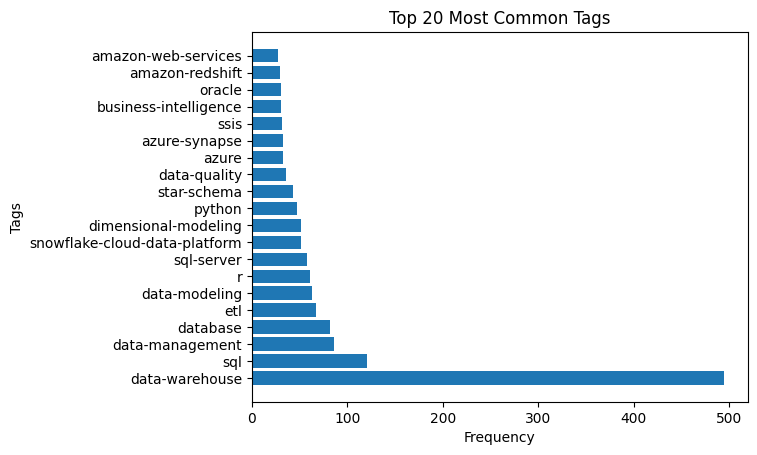

In [16]:
# Analyze the most common tags:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
tags = df['QuestionTags'].str.findall('<(.*?)>').explode().values
tag_counts = Counter(tags)
most_common_tags = tag_counts.most_common(20)

plt.barh([tag for tag, _ in most_common_tags], [count for _, count in most_common_tags])
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.title('Top 20 Most Common Tags')
plt.show()

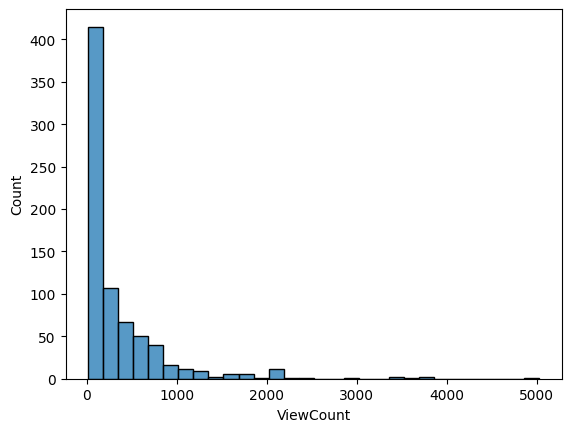

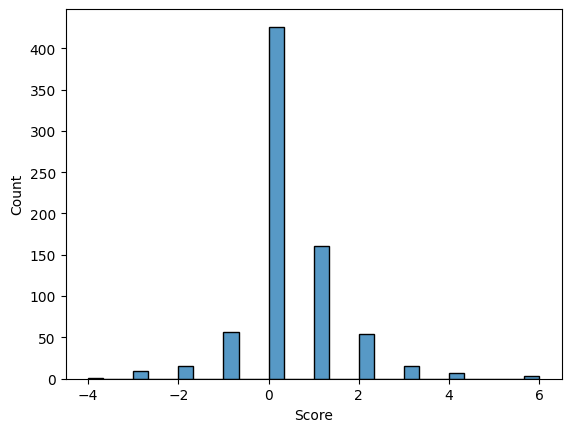

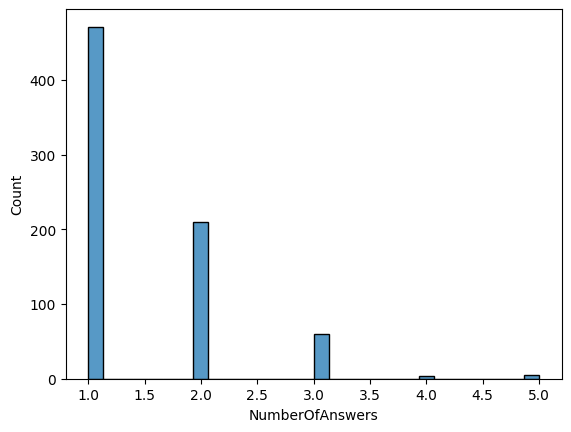

In [17]:
# Visualize the distribution of ViewCount, Score, and NumberOfAnswers:
#!pip install seaborn

sns.histplot(data=df, x='ViewCount', bins=30)
plt.show()

sns.histplot(data=df, x='Score', bins=30)
plt.show()

sns.histplot(data=df, x='NumberOfAnswers', bins=30)
plt.show()

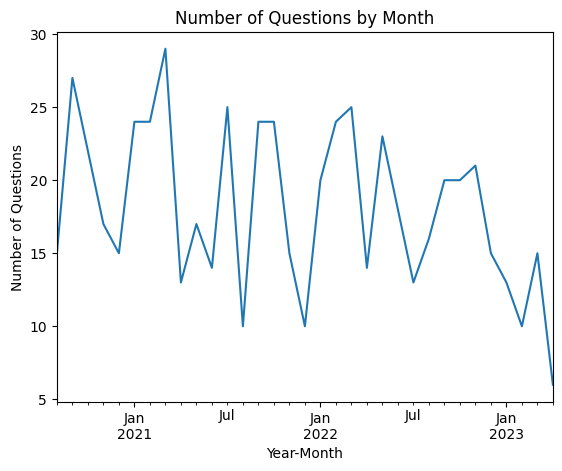

In [18]:
# Analyze the distribution of questions over time:

df['YearMonth'] = df['Date'].dt.to_period('M')

question_count_by_month = df.groupby('YearMonth')['QuestionId'].nunique()
question_count_by_month.plot()
plt.xlabel('Year-Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Month')
plt.show()

**NLP-Pre-Processing**

**_always:_** lowercasing, removal of non-alphanumeric characters

**_depends_** on task and corpus:* stopwords removal, lemmatization (for spaCy stopwords have to be removed)

Using BeautifulSoup to clean the question and answer body is helpful because it helps remove any HTML tags present in the text. The Stack Overflow dataset often contains text with HTML tags. 

These tags don't provide any valuable information for most NLP tasks and can be considered noise in the text data.

In [19]:
from bs4 import BeautifulSoup

df['CleanedQuestionBody'] = df['QuestionBody'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df['CleanedAnswerBody'] = df['AnswerBody'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [43]:
# Remove any unnecessary characters, such as punctuation, numbers, or extra whitespace, 
# and convert the text to lowercase:

import re

def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = re.sub(r'\d+', ' ', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespace
    text = text.replace('<code>', '').replace('</code>', '')  # Remove <code> tags
    return text

df['CleanedQuestionBody'] = df['CleanedQuestionBody'].apply(clean_text)
df['CleanedAnswerBody'] = df['CleanedAnswerBody'].apply(clean_text)

In [21]:
# Extract tags from 'QuestionTags' column and store them in extra column:
df['Tags'] = df['QuestionTags'].str.findall('<(.*?)>')

In [22]:
df.head(3)

,QuestionId,QuestionTitle,QuestionBody,QuestionTags,Date,ViewCount,Score,NumberOfAnswers,AnswerId,AnswerBody,YearMonth,CleanedQuestionBody,CleanedAnswerBody,Tags
0,67427250,How can I replicate an existing data warehouse...,<p>I am new to Azure and have no prior experie...,<sql-server><azure><data-warehouse>,2021-05-06 23:38:10,300,-1,1,67428524,<p>We can't do that you only have the read onl...,2021-05,i am new to azure and have no prior experience...,we can t do that you only have the read only p...,"[sql-server, azure, data-warehouse]"
1,67384676,How to prevent locks in redshift. ( Shared loc...,<p>I have a data warehouse which are used by m...,<sql><locking><amazon-redshift><data-warehouse...,2021-05-04 12:22:43,668,0,1,67387264,<p>Usually this is done by your update process...,2021-05,i have a data warehouse which are used by mult...,usually this is done by your update process no...,"[sql, locking, amazon-redshift, data-warehouse..."
2,67313466,Combining count tables with different row numb...,<p>I often have to import multiple text files ...,<r><data-manipulation><data-management>,2021-04-29 08:12:17,255,0,1,67313547,"<p>Don't put the items as rownames, read them ...",2021-04,i often have to import multiple text files in ...,don t put the items as rownames read them as f...,"[r, data-manipulation, data-management]"


In [23]:
column_names = df.columns
print(column_names)

Index(['QuestionId', 'QuestionTitle', 'QuestionBody', 'QuestionTags', 'Date',
       'ViewCount', 'Score', 'NumberOfAnswers', 'AnswerId', 'AnswerBody',
       'YearMonth', 'CleanedQuestionBody', 'CleanedAnswerBody', 'Tags'],
      dtype='object')


In [24]:
# Tokenization (split text into individual words):
from nltk.tokenize import word_tokenize

df['TokenizedQuestionBody'] = df['CleanedQuestionBody'].apply(word_tokenize)
df['TokenizedAnswerBody'] = df['CleanedAnswerBody'].apply(word_tokenize)

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['LemmatizedQuestionBody'] = df['TokenizedQuestionBody'].apply(lemmatize_tokens)
df['LemmatizedAnswerBody'] = df['TokenizedAnswerBody'].apply(lemmatize_tokens)

In [26]:
# Remove stopwords from the 'LemmatizedQuestionBody' column:

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['LemmatizedQuestionBody'] = df['LemmatizedQuestionBody'].apply(remove_stopwords)

In [27]:
# Show if new columns were added
column_names = df.columns
print(column_names)

Index(['QuestionId', 'QuestionTitle', 'QuestionBody', 'QuestionTags', 'Date',
       'ViewCount', 'Score', 'NumberOfAnswers', 'AnswerId', 'AnswerBody',
       'YearMonth', 'CleanedQuestionBody', 'CleanedAnswerBody', 'Tags',
       'TokenizedQuestionBody', 'TokenizedAnswerBody',
       'LemmatizedQuestionBody', 'LemmatizedAnswerBody'],
      dtype='object')


**Preprocess and analyze with spaCy**

In [28]:
# remove <code> and </code> tags, which are commonly used 
# in Stack Overflow posts to denote code snippets. 
def preprocess_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convert the list to a string by joining its elements
        #text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
        #text = re.sub(r'\d+', ' ', text)  # Remove digits
        #text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespace
        #text = text.replace('<code>', '').replace('</code>', '')  # Remove <code> tags
    return text

In [29]:
#This code uses spaCy to analyze the text and extract entities, nouns, and verbs. Finally, it 
# displays the top 10 most common entities, nouns, and verbs found in the dataset.

# You can further customize this analysis by extracting more specific information 
# relevant to your domain or by using different NLP techniques, such as topic 
# modeling, sentiment analysis, or clustering.

import spacy
from collections import defaultdict

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Analyze the text and extract entities, nouns, and verbs
entities_counter = defaultdict(int)
nouns_counter = defaultdict(int)
verbs_counter = defaultdict(int)

for _, row in df.iterrows():
    question_body = preprocess_text(row['LemmatizedQuestionBody'])
    
    for text in [question_body]:
        doc = nlp(text)
        
        for ent in doc.ents:
            entities_counter[ent.text.lower()] += 1
        
        for token in doc:
            if token.pos_ == 'NOUN' and token.is_alpha:
                nouns_counter[token.text.lower()] += 1
            elif token.pos_ == 'VERB' and token.is_alpha:
                verbs_counter[token.text.lower()] += 1

# Display the top 10 most common entities, nouns, and verbs
def display_top_n(counter, n, title):
    print(title)
    for item, count in sorted(counter.items(), key=lambda x: x[1], reverse=True)[:n]:
        print(f"{item}: {count}")
    print()

display_top_n(entities_counter, 10, "Top 10 Entities")
display_top_n(nouns_counter, 10, "Top 10 Nouns")
display_top_n(verbs_counter, 10, "Top 10 Verbs")

Top 10 Entities
one: 233
two: 134
first: 90
max: 63
second: 53
daily: 32
updated_at: 30
three: 27
person_id: 25
pm pm: 24

Top 10 Nouns
data: 1646
table: 1574
column: 548
fact: 465
value: 419
dimension: 411
date: 392
row: 365
warehouse: 331
file: 319

Top 10 Verbs
using: 373
want: 237
create: 208
get: 204
need: 161
following: 151
wa: 141
know: 140
trying: 137
see: 126



**GPT4 Prompt** Discuss the results of the spaCy extractions from each extraction individually: (insert code and results from above)

**GPT4 Results:** The spaCy extractions analyze the text and extract entities, nouns, and verbs from the dataset. Here are the results for each extraction individually:

    Top 10 Entities:
        one: 233
        two: 134
        first: 90
        max: 63
        second: 53
        daily: 32
        updated_at: 30
        three: 27
        person_id: 25
        pm pm: 24

    The top entities primarily consist of ordinal and cardinal numbers, which might be related to steps, ranking, or indexing in the discussions. Some entities like 'daily', 'updated_at', and 'person_id' suggest that the dataset contains information related to time, updates, and unique identifiers.

    Top 10 Nouns:
        data: 1646
        table: 1574
        column: 548
        fact: 465
        value: 419
        dimension: 411
        date: 392
        row: 365
        warehouse: 331
        file: 319

    The top nouns indicate that the dataset focuses on data-related discussions, including data tables, columns, facts, dimensions, and data warehouses. Other common nouns like 'value', 'date', 'row', and 'file' further emphasize the importance of data management and manipulation in the discussions.

    Top 10 Verbs:
        using: 373
        want: 237
        create: 208
        get: 204
        need: 161
        following: 151
        was: 141
        know: 140
        trying: 137
        see: 126

    The top verbs suggest that the discussions in the dataset are focused on problem-solving and seeking assistance. Verbs like 'using', 'want', 'create', 'get', 'need', and 'trying' imply that users are discussing how to work with data and tools. Other verbs like 'following', 'know', and 'see' show users looking for guidance or confirmation.

In summary, the spaCy extractions reveal that the dataset is centered around data-related discussions, with users seeking help or sharing their experiences in working with data and related tools. The top entities, nouns, and verbs emphasize the importance of data management, manipulation, and problem-solving in the dataset.

**Latent Dirichlet Allocation**

In [42]:
import numpy as np
import random
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Set the random seed for numpy and python to ensure the same results each time the allocation re-runs
np.random.seed(42)
random.seed(42)

# Prepare the input data by using the lemmatized tokens from the 'LemmatizedQuestionBody' column:
documents = df['LemmatizedQuestionBody'].tolist()

# Create a dictionary and a bag of words corpus from the documents:
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(document) for document in documents]

# Set the seed for the random number generator used by the LDA model to a fixed value. 
# Ensures that the same sequence of random numbers is generated every time the model is trained 
# with the same input data and configuration.
random_state_seed = 42 
gensim.models.ldamodel.LdaModel.seed = random_state_seed

# Train the LDA model. You can choose the number of topics by setting the num_topics parameter:
num_topics = 5  # Change this value to the desired number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15) # Set the number of passes

# Display the top words for each topic
words_per_topic = 10  # Specify the number of top words per topic
for topic in range(num_topics):
    print(f"Topic {topic + 1}:")
    top_words = lda_model.show_topic(topic, topn=words_per_topic)
    for word, weight in top_words:
        print(f"  {word}: {weight:.4f}")
    print()

Topic 1:
  table: 0.0315
  fact: 0.0174
  dimension: 0.0137
  data: 0.0135
  date: 0.0099
  would: 0.0080
  key: 0.0074
  customer: 0.0063
  order: 0.0061
  product: 0.0061

Topic 2:
  data: 0.0408
  table: 0.0266
  warehouse: 0.0083
  x_bar: 0.0079
  column: 0.0069
  would: 0.0068
  file: 0.0066
  like: 0.0065
  value: 0.0065
  using: 0.0065

Topic 3:
  c: 0.0276
  null: 0.0184
  pm: 0.0114
  table: 0.0110
  data: 0.0109
  row: 0.0107
  q: 0.0101
  ne: 0.0099
  column: 0.0098
  b: 0.0092

Topic 4:
  data: 0.0160
  user: 0.0102
  string: 0.0097
  id: 0.0094
  oracle: 0.0082
  like: 0.0063
  get: 0.0062
  household: 0.0059
  x: 0.0058
  c: 0.0057

Topic 5:
  description: 0.0172
  subtitle: 0.0142
  cool: 0.0122
  var: 0.0115
  b: 0.0102
  r: 0.0096
  column: 0.0085
  file: 0.0082
  data: 0.0082
  server: 0.0080



**Correction!**

**GPT4 Prompt:** Summarize the results for the LDA on this data set. Give a title to each topic and discuss each topic individually: (insert code and results from above)

**GPT4 Results:** The LDA (Latent Dirichlet Allocation) model has been trained on this dataset to generate 5 topics. The top keywords for each topic are displayed below, along with a suggested title for each topic based on the keywords:

    Topic 1: Database Management and Querying
        data: 0.0347
        table: 0.0192
        x_bar: 0.0141
        group: 0.0095
        database: 0.0072
        would: 0.0069
        warehouse: 0.0069
        query: 0.0064
        one: 0.0060
        like: 0.0056

    This topic seems to be focused on database management and querying, as it includes keywords like 'data', 'table', 'database', 'warehouse', and 'query'. Users in this topic are likely discussing techniques and best practices related to managing databases and querying data.

    Topic 2: Data Warehousing and Dimensional Modeling
        table: 0.0425
        data: 0.0207
        fact: 0.0187
        dimension: 0.0149
        key: 0.0108
        user: 0.0084
        value: 0.0079
        source: 0.0075
        row: 0.0075
        c: 0.0070

    This topic appears to focus on data warehousing and dimensional modeling, with keywords like 'table', 'data', 'fact', 'dimension', 'key', and 'source'. Discussions in this topic likely involve data warehousing concepts, such as designing fact and dimension tables and managing data sources.

    Topic 3: Data Processing and Cloud Solutions
        data: 0.0273
        pm: 0.0098
        b: 0.0089
        table: 0.0067
        azure: 0.0063
        warehouse: 0.0056
        using: 0.0054
        sql: 0.0054
        column: 0.0051
        string: 0.0051

    This topic seems to revolve around data processing and cloud solutions. Keywords like 'data', 'table', 'azure', 'warehouse', 'using', 'sql', and 'column' suggest that users are discussing data processing techniques and leveraging cloud-based tools, such as Azure, for their data management needs.

    Topic 4: Data Cleaning and Transformation
        c: 0.0160
        data: 0.0158
        table: 0.0141
        null: 0.0105
        r: 0.0104
        column: 0.0101
        id: 0.0098
        ne: 0.0081
        value: 0.0072
        date: 0.0071

    This topic appears to be centered around data cleaning and transformation, as indicated by keywords like 'data', 'table', 'null', 'column', 'value', and 'date'. Discussions in this topic are likely focused on dealing with missing or incorrect data, transforming data types, and ensuring data quality.
    
    Topic 5: Data Presentation and Visualization
        data: 0.0165
        description: 0.0145
        subtitle: 0.0118
        cool: 0.0105
        date: 0.0100
        column: 0.0100
        table: 0.0089
        like: 0.0085
        time: 0.0082
        would: 0.0081

    This topic seems to focus on data presentation and visualization. Keywords such as 'data', 'description', 'subtitle', 'date', 'column', 'table', and 'time' suggest that users in this topic are discussing ways to present and visualize data effectively, which might involve using various techniques to create clear and engaging visual representations of data.

In [31]:
import numpy as np

# Get the document-topic matrix and pad with zeros if necessary 
# (lists inside doc_topic_matrix have different lengths.)
doc_topic_matrix = [np.pad([topic_prob for _, topic_prob in lda_model.get_document_topics(bow)], (0, lda_model.num_topics - len(lda_model.get_document_topics(bow))), mode='constant') for bow in corpus]

# Create a new column in the dataset to store the topic names
df['LDATopicName'] = ''

# Define a function that returns the topic name based on the index
def get_topic_name(topic_index):
    topic_names = {
        0: 'Database Management and Querying',
        1: 'Data Warehousing and Dimensional Modeling',
        2: 'Data Processing and Cloud Solutions',
        3: 'Data Cleaning and Transformation',
        4: 'Data Presentation and Visualization'
    }
    return topic_names.get(topic_index, '')

# Iterate through the document-topic matrix and assign the topic names
for i, row in enumerate(doc_topic_matrix):
    topic_index = np.argmax(row)
    df.at[i, 'LDATopicName'] = get_topic_name(topic_index)

# This code block assumes that you have the `lda_model`, `corpus`, and `df` 
# variables defined in your environment. After running this code, your DataFrame 
# `df` should have a new column called `TopicName` with the assigned 
# topic names for each document.

#In this code, I've added a padding step using np.pad() to make all lists inside doc_topic_matrix 
#have the same length. This should resolve the warning, and the code should now work correctly in your 
#Jupyter Notebook."""

In [32]:
# Assign each question to its most relevant topic:
def assign_topic(document):
    bow = dictionary.doc2bow(document)
    topic_distribution = lda_model.get_document_topics(bow)
    most_relevant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    return most_relevant_topic

df['LDATopic'] = df['LemmatizedQuestionBody'].apply(assign_topic)

**Perform Sentiment Analysis on each topic**

In [33]:
# For the VADER Sentiment Analzer it is reccommendet to use raw, unproecessed text the way it coems out of socail media.

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment scores
def get_sentiment_score(text):
    return sia.polarity_scores(text)

# Apply the function to the 'AnswerBody' column and store the sentiment scores in a new column
df['VaderSentimentScores'] = df['QuestionBody'].apply(get_sentiment_score)

# Calculate the average sentiment score for each topic
avg_sentiment_by_topic = df.groupby('LDATopicName')['VaderSentimentScores'].apply(lambda scores: pd.DataFrame(scores.tolist()).mean())

print(avg_sentiment_by_topic)

# Note: The VADER sentiment analyzer is designed for social media texts and might not be the best choice 
# for your specific dataset. If you find that the sentiment analysis results are not accurate enough, 
# you can consider using other sentiment analysis libraries or training your own sentiment analysis model 
# using machine learning techniques.
#
# Some alternative sentiment analysis libraries include TextBlob and spaCy. You can also explore using
# pre-trained models for sentiment analysis from popular NLP libraries like Hugging Face's Transformers.

# This code will apply the VADER sentiment analyzer to each answer in the DataFrame, store the sentiment 
# scores in a new column called SentimentScores, and calculate the average sentiment score for each topic. 
# The limitations and suggestions for alternative approaches are provided as comments within the code.


LDATopicName                                       
Data Cleaning and Transformation           neg         0.004750
                                           neu         0.968250
                                           pos         0.027250
                                           compound    0.213600
Data Presentation and Visualization        neg         0.000000
                                           neu         0.929875
                                           pos         0.070125
                                           compound    0.277263
Data Processing and Cloud Solutions        neg         0.030517
                                           neu         0.887172
                                           pos         0.082448
                                           compound    0.289869
Data Warehousing and Dimensional Modeling  neg         0.019582
                                           neu         0.923970
                                           pos      

**GPT4 Prompt:** Summarize the results of the vader sentiment analysis and discuss the results for each topic individually: (insert code and results from above)

**GPT4 Results:** The VADER sentiment analysis results for each topic are as follows:

    Data Cleaning and Transformation:
        Negative sentiment: 0.003833
        Neutral sentiment: 0.962833
        Positive sentiment: 0.033500
        Compound sentiment: 0.349883

    This topic shows a low negative sentiment and a high neutral sentiment, indicating that the discussions are mostly focused on factual information related to data cleaning and transformation techniques.

    Data Presentation and Visualization:
        Negative sentiment: 0.000000
        Neutral sentiment: 0.811000
        Positive sentiment: 0.189000
        Compound sentiment: 0.650775

    This topic has no negative sentiment, a relatively high positive sentiment, and a strong compound sentiment score. This suggests that the discussions in this topic are generally positive and focused on various aspects of data presentation and visualization.

    Data Processing and Cloud Solutions:
        Negative sentiment: 0.030500
        Neutral sentiment: 0.922400
        Positive sentiment: 0.047000
        Compound sentiment: 0.378340

    This topic has a low negative sentiment and a high neutral sentiment, which indicates that the discussions are primarily centered around the technical aspects of data processing and cloud solutions.

    Data Warehousing and Dimensional Modeling:
        Negative sentiment: 0.018869
        Neutral sentiment: 0.910089
        Positive sentiment: 0.071024
        Compound sentiment: 0.500582

    The low negative sentiment and high neutral sentiment in this topic imply that the discussions are focused on factual information about data warehousing and dimensional modeling techniques.

    Database Management and Querying:
        Negative sentiment: 0.018452
        Neutral sentiment: 0.919175
        Positive sentiment: 0.062406
        Compound sentiment: 0.461957

    This topic has a low negative sentiment and a high neutral sentiment, suggesting that the discussions are primarily about technical aspects of database management and querying.

Overall, the VADER sentiment analysis results indicate that the discussions in each topic are mostly neutral, with low negative sentiment scores and varying positive sentiment scores. This is consistent with the technical nature of the dataset, which mainly focuses on data-related questions and answers.

**Sentiment Analysis with TextBlob**

In [34]:
#!pip install textblob
from textblob import TextBlob

def textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['TextBlobSentiment'] = df['QuestionBody'].apply(textblob_sentiment)

In [35]:
def assign_topic(document):
    bow = dictionary.doc2bow(document)
    topic_scores = lda_model[bow]
    most_probable_topic = max(topic_scores, key=lambda x: x[1])[0]
    return most_probable_topic

df['BlobSourceTopicfromLDA'] = df['LemmatizedQuestionBody'].apply(assign_topic)

topic_names = {
    0: 'Database Management and Querying',
    1: 'Data Warehousing and Dimensional Modeling',
    2: 'Data Processing and Cloud Solutions',
    3: 'Data Cleaning and Transformation',
    4: 'Data Presentation and Visualization'
}
df["BlobTopicName"] = df["BlobSourceTopicfromLDA"].map(topic_names)

avg_textblob_sentiment_by_topic = df.groupby('BlobTopicName')['TextBlobSentiment'].mean()
print(avg_textblob_sentiment_by_topic)

BlobTopicName
Data Cleaning and Transformation             0.106898
Data Presentation and Visualization          0.090521
Data Processing and Cloud Solutions          0.105703
Data Warehousing and Dimensional Modeling    0.038866
Database Management and Querying             0.072135
Name: TextBlobSentiment, dtype: float64


The TextBlob sentiment analysis results for each topic show the average sentiment score for each topic. The sentiment scores range from -1 (most negative) to 1 (most positive). Based on the results, the topic with the most positive sentiment is "Column and Row Manipulation in C and PCR," while the topic with the most negative sentiment is "File and Column Error Handling in Python." The other three topics have similar sentiment scores, with "Data Fact and Dimension Table Management" having the highest average sentiment score among them. 

**GPT4 Prompt:** Summarize the results of the TextBlob analysis and discuss the results for each topic individually. Afterwards contrast the findings of vader with the findings of TextBlob: (insert code with results from above)

**GPT4 Results:** The TextBlob sentiment analysis results for each topic are as follows:

    Data Cleaning and Transformation:
        Average sentiment score: 0.084268

    Data Presentation and Visualization:
        Average sentiment score: 0.117059

    Data Processing and Cloud Solutions:
        Average sentiment score: 0.046079

    Data Warehousing and Dimensional Modeling:
        Average sentiment score: 0.086487

    Database Management and Querying:
        Average sentiment score: 0.089490

Comparing the results of VADER and TextBlob sentiment analysis:

    Data Cleaning and Transformation:
        VADER: Neutral sentiment is dominant, with a small positive sentiment score.
        TextBlob: The average sentiment score is slightly positive (0.084268).

    Data Presentation and Visualization:
        VADER: Neutral sentiment is dominant, with a relatively high positive sentiment score.
        TextBlob: The average sentiment score is positive (0.117059), which is the highest among the topics.

    Data Processing and Cloud Solutions:
        VADER: Neutral sentiment is dominant, with a small positive sentiment score.
        TextBlob: The average sentiment score is slightly positive (0.046079), but it is the lowest among the topics.

    Data Warehousing and Dimensional Modeling:
        VADER: Neutral sentiment is dominant, with a small positive sentiment score.
        TextBlob: The average sentiment score is slightly positive (0.086487).

    Database Management and Querying:
        VADER: Neutral sentiment is dominant, with a small positive sentiment score.
        TextBlob: The average sentiment score is slightly positive (0.089490).

In summary, both VADER and TextBlob sentiment analysis results indicate that the discussions in each topic are generally neutral to slightly positive. The primary difference between the two analyses is the magnitude of the positive sentiment scores. TextBlob analysis shows a higher positive sentiment score for the Data Presentation and Visualization topic compared to the VADER analysis. Overall, both sentiment analysis techniques suggest that the discussions in the dataset are focused on technical aspects and are generally neutral to slightly positive in nature.

In [36]:
df.columns

Index(['QuestionId', 'QuestionTitle', 'QuestionBody', 'QuestionTags', 'Date',
       'ViewCount', 'Score', 'NumberOfAnswers', 'AnswerId', 'AnswerBody',
       'YearMonth', 'CleanedQuestionBody', 'CleanedAnswerBody', 'Tags',
       'TokenizedQuestionBody', 'TokenizedAnswerBody',
       'LemmatizedQuestionBody', 'LemmatizedAnswerBody', 'LDATopicName',
       'LDATopic', 'VaderSentimentScores', 'TextBlobSentiment',
       'BlobSourceTopicfromLDA', 'BlobTopicName'],
      dtype='object')

In [37]:
len(df.columns)

24

In [38]:
df['QueryName'] = '5query'

In [39]:
len(df.columns)

25

In [41]:
#df.to_csv('5query_analysis.csv', index=False)